In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

plt.rcParams['font.family'] = 'AppleGothic'

In [2]:
train = pd.read_csv('data/물류 유통량 예측 경진대회/train.csv')
test = pd.read_csv('data/물류 유통량 예측 경진대회/test.csv')

In [3]:
train.head()

,index,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리,운송장_건수
0,0,5011000595017300,2871000192069300,음반,3
1,1,4148000690043300,5011000264024400,문화컨텐츠,3
2,2,5011000078068400,1120000007005400,농산물,3
3,3,4127100048006400,5011000587019400,기타식품,7
4,4,5011000078068400,2823700010076300,농산물,3


In [4]:
test.head()

,index,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리
0,0,4167000577042200,5011000435014100,선케어
1,1,1156000009012200,5011000172034400,구강위생용품
2,2,4122000363057300,5011000361097300,캠핑
3,3,5011000436041400,2826000084036400,아웃도어가구
4,4,4150000241065200,5011000169044300,분유/이유식/아기간식


In [5]:
train.isnull().sum()

index           0
송하인_격자공간고유번호    0
수하인_격자공간고유번호    0
물품_카테고리         0
운송장_건수          0
dtype: int64

In [6]:
test.isnull().sum()

index           0
송하인_격자공간고유번호    0
수하인_격자공간고유번호    0
물품_카테고리         0
dtype: int64

<AxesSubplot:xlabel='송하인_격자공간고유번호', ylabel='운송장_건수'>

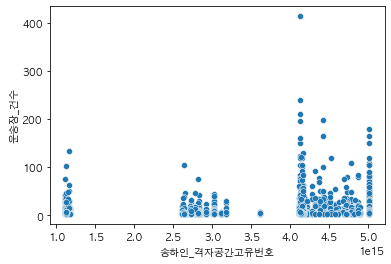

In [7]:
sns.scatterplot(data=train, x='송하인_격자공간고유번호', y='운송장_건수')

<AxesSubplot:xlabel='수하인_격자공간고유번호', ylabel='운송장_건수'>

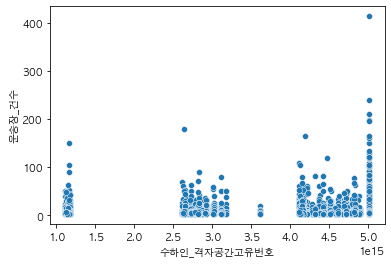

In [8]:
sns.scatterplot(data=train, x='수하인_격자공간고유번호', y='운송장_건수')

<AxesSubplot:xlabel='물품_카테고리', ylabel='운송장_건수'>

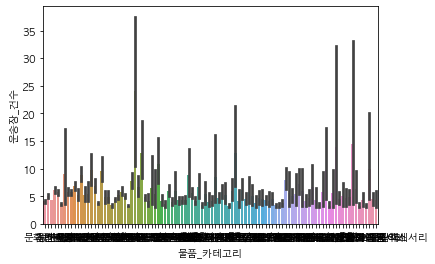

In [9]:
sns.barplot(data=train, x='물품_카테고리', y='운송장_건수')

In [10]:
train = train.drop('index', axis=1)
test = test.drop('index', axis=1)

In [11]:
train = pd.get_dummies(data=train, columns=['물품_카테고리'])

In [12]:
train.columns

Index(['송하인_격자공간고유번호', '수하인_격자공간고유번호', '운송장_건수', '물품_카테고리_DIY자재/용품',
       '물품_카테고리_PC', '물품_카테고리_PC주변기기', '물품_카테고리_가공식품', '물품_카테고리_가방',
       '물품_카테고리_건강식품', '물품_카테고리_건강용품',
       ...
       '물품_카테고리_클렌징', '물품_카테고리_태블릿PC/노트북액세서리', '물품_카테고리_패션소품', '물품_카테고리_하의',
       '물품_카테고리_향수', '물품_카테고리_헤어스타일링', '물품_카테고리_헤어액세서리', '물품_카테고리_헤어케어',
       '물품_카테고리_헬스', '물품_카테고리_홈데코'],
      dtype='object', length=103)

In [13]:
test = pd.get_dummies(data=test, columns=['물품_카테고리'])
test.columns

Index(['송하인_격자공간고유번호', '수하인_격자공간고유번호', '물품_카테고리_DIY자재/용품', '물품_카테고리_PC',
       '물품_카테고리_PC주변기기', '물품_카테고리_가공식품', '물품_카테고리_가방', '물품_카테고리_건강식품',
       '물품_카테고리_건강용품', '물품_카테고리_게임기/타이틀',
       ...
       '물품_카테고리_클렌징', '물품_카테고리_태블릿PC/노트북액세서리', '물품_카테고리_패션소품', '물품_카테고리_하의',
       '물품_카테고리_향수', '물품_카테고리_헤어스타일링', '물품_카테고리_헤어액세서리', '물품_카테고리_헤어케어',
       '물품_카테고리_헬스', '물품_카테고리_홈데코'],
      dtype='object', length=102)

## 모든 컬럼 사용한 데이터셋

In [14]:
all_train = train.copy()
all_train = all_train.drop('운송장_건수', axis=1)
target_label = train['운송장_건수'].values
all_train = all_train.values
all_train_x, all_val_x, all_train_y, all_val_y = train_test_split(all_train, target_label, test_size=0.2)

In [15]:
all_naive_model = RandomForestRegressor()

In [16]:
all_naive_model.fit(all_train_x, all_train_y)

RandomForestRegressor()

In [17]:
all_naive_model.score(all_train_x, all_train_y)

0.4870556408989841

In [18]:
all_naive_model.score(all_val_x, all_val_y)

0.1268802416030096

In [19]:
test_array = test.values
all_naive_model_test_result = all_naive_model.predict(test_array)
print(all_naive_model_test_result)

[16.37865079  3.849      10.6        ...  3.55247623  3.92211536
  3.35430281]


## 송하인만 있는 데이터셋 (수하인 제외)

In [20]:
shipper_train = train.copy()
shipper_train = shipper_train.drop(['운송장_건수', '수하인_격자공간고유번호'], axis=1)
shipper_train = shipper_train.values

In [21]:
shipper_train_x, shipper_val_x, shipper_train_y, shipper_val_y = train_test_split(shipper_train, target_label, test_size=0.2)

In [22]:
shipper_naive_model = RandomForestRegressor()

In [23]:
shipper_naive_model.fit(shipper_train_x, shipper_train_y)

RandomForestRegressor()

In [24]:
shipper_naive_model.score(shipper_train_x, shipper_train_y)

0.3728874467920774

In [25]:
shipper_naive_model.score(shipper_val_x, shipper_val_y)

-0.1401002372902138

In [26]:
shipper_val_predict = shipper_naive_model.predict(shipper_val_x)
metrics.mean_squared_error(y_true=shipper_val_y, y_pred=shipper_val_predict)

40.200356963659985